In [8]:
import osmnx as ox
import pandas as pd

# Define the bounding box or location
place_name = "New York City, USA"  # Example area
tags = {'amenity': True}  # Fetch all amenities

# Fetch amenities in the defined area
gdf = ox.features_from_place(place_name, tags)

# Extract latitude and longitude from the geometries
gdf['latitude'] = gdf.geometry.centroid.y
gdf['longitude'] = gdf.geometry.centroid.x

# Filter for relevant columns
amenities_lat_lon_df = gdf[['amenity', 'name', 'latitude', 'longitude']]

# Display the DataFrame
print(amenities_lat_lon_df)

# Save to a CSV file (optional)
amenities_lat_lon_df.to_csv("Amenities_NYC_all.csv", index=False)

c:\Users\rudra\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\features.py:690: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  gdf.loc[:, "geometry"] = gdf["geometry"].make_valid()
C:\Users\rudra\AppData\Local\Temp\ipykernel_10968\3574731375.py:12: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['latitude'] = gdf.geometry.centroid.y
C:\Users\rudra\AppData\Local\Temp\ipykernel_10968\3574731375.py:13: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gdf['longitude'] = gdf.geometr

                             amenity                        name   latitude  \
element id                                                                    
node    42538083               bench                         NaN  40.673352   
        42723103      ferry_terminal  Hart Island Ferry Terminal  40.852182   
        42808233    parking_entrance                         NaN  40.688258   
        42932643             parking                         NaN  40.715403   
        46884313    parking_entrance                         NaN  40.645515   
...                              ...                         ...        ...   
way     1338988240           parking                         NaN  40.596363   
        1338990060           shelter                         NaN  40.593130   
        1338990062           parking                         NaN  40.593242   
        1338991835            school            Public School 68  40.625207   
        1338998127            shower                

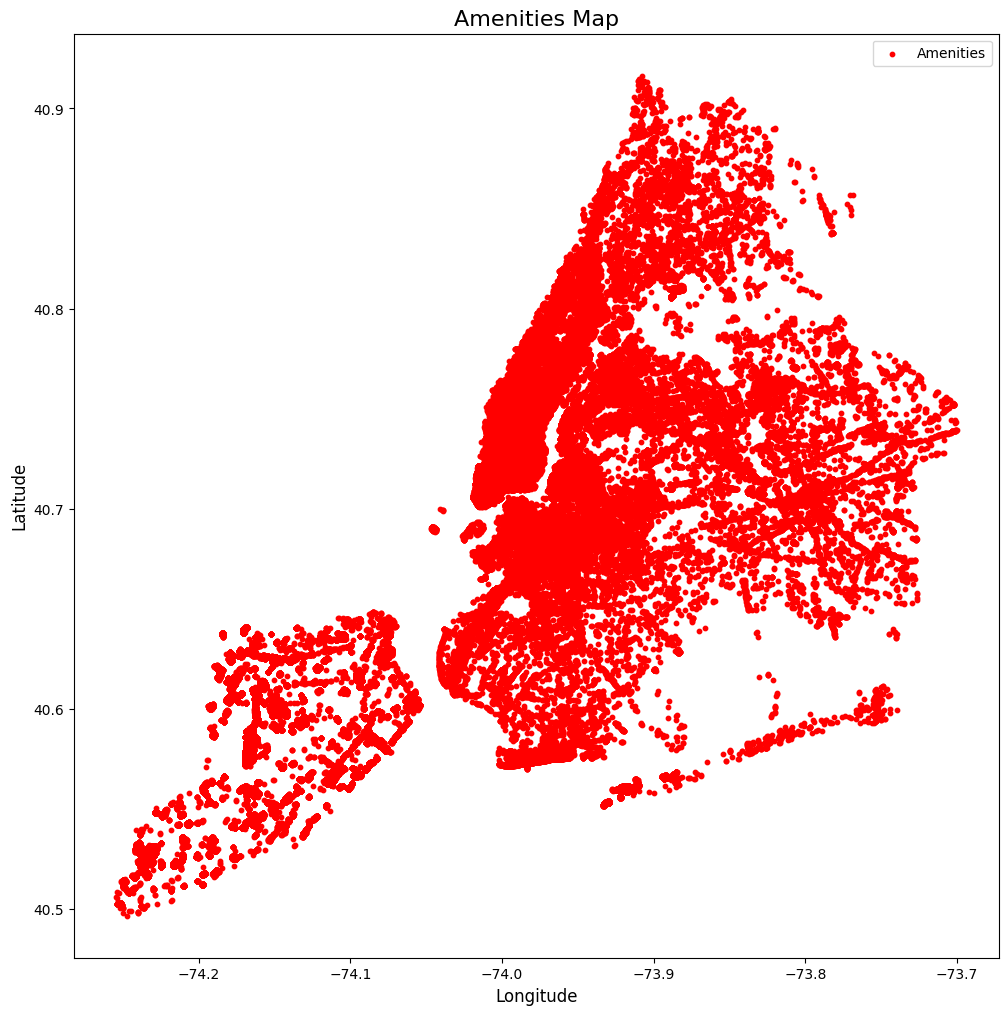

In [6]:
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# # Load the DataFrame (from the previous script)
# amenities_df = pd.read_csv("amenities_with_lat_long.csv")  # Replace with your DataFrame variable if not saved

# Convert the DataFrame to a GeoDataFrame
geometry = [Point(xy) for xy in zip(amenities_lat_lon_df['longitude'], amenities_lat_lon_df['latitude'])]
gdf = gpd.GeoDataFrame(amenities_lat_lon_df, geometry=geometry, crs="EPSG:4326")  # WGS84 CRS

# Plot the amenities
fig, ax = plt.subplots(figsize=(12, 12))

# Plot the points from the GeoDataFrame
gdf.plot(ax=ax, color='red', markersize=10, label='Amenities')

# Add labels and styling
ax.set_title("Amenities Map", fontsize=16)
ax.set_xlabel("Longitude", fontsize=12)
ax.set_ylabel("Latitude", fontsize=12)
plt.legend()
plt.show()

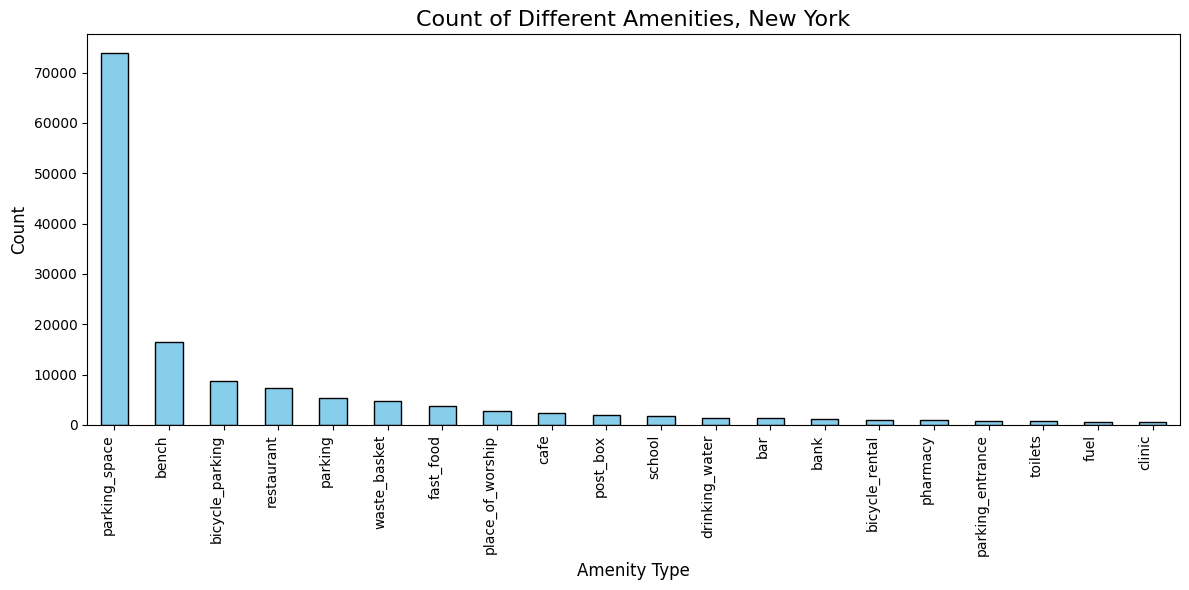

In [7]:

# Group by 'amenity' and count occurrences
amenity_counts = amenities_lat_lon_df['amenity'].value_counts()

top_10_amenities = amenity_counts.head(20)
# Plot a bar chart
plt.figure(figsize=(12, 6))
top_10_amenities.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Count of Different Amenities, New York", fontsize=16)
plt.xlabel("Amenity Type", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.tight_layout()